,Open,High,Low,Close,Volume,D-1,V-1,D-2,V-2,D-3,...,D-17,V-17,D-18,V-18,D-19,V-19,D-20,V-20,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4494.649902,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4546.200195,0.0,4494.649902,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4732.350098,0.0,4546.200195,0.0,4494.649902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4747.549805,0.0,4732.350098,0.0,4546.200195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4932.200195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12 00:00:00+05:30,21800.800781,21831.699219,21574.750000,21616.050781,287400,21782.500000,349200.0,21717.949219,491100.0,21930.500000,...,22032.300781,292400.0,22097.449219,345500.0,21894.550781,294700.0,21647.199219,212500.0,21743.250000,1
2024-02-13 00:00:00+05:30,21664.300781,21766.800781,21543.349609,21743.250000,365800,21616.050781,287400.0,21782.500000,349200.0,21717.949219,...,21571.949219,456000.0,22032.300781,292400.0,22097.449219,345500.0,21894.550781,294700.0,21840.050781,1
2024-02-14 00:00:00+05:30,21578.150391,21870.849609,21530.199219,21840.050781,359100,21743.250000,365800.0,21616.050781,287400.0,21782.500000,...,21462.250000,387300.0,21571.949219,456000.0,22032.300781,292400.0,22097.449219,345500.0,21910.750000,1


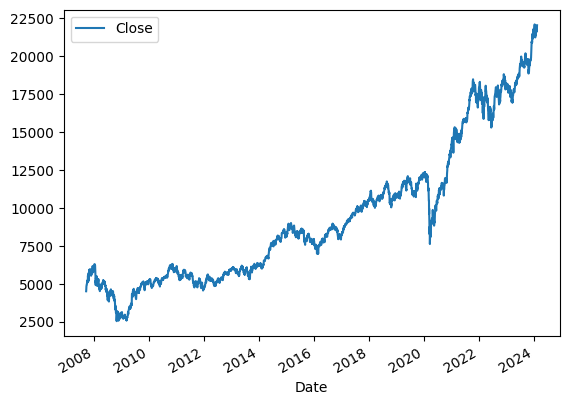

In [39]:
import yfinance as yf 

stock = yf.Ticker('^NSEI').history(period='max')
stock.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
num_prev_values = 20
for i in range(1, num_prev_values + 1):
    stock[f'D-{i}'] = stock['Close'].shift(i)
    stock[f'V-{i}'] = stock['Volume'].shift(i)

stock['Tomorrow'] = stock['Close'].shift(-1)
stock['Target'] = (stock['Tomorrow'] > stock['Close']).astype(int)
stock = stock.loc['2006-01-01':].copy()
stock.plot.line(y='Close',use_index=True)
stock

0.5816326530612245

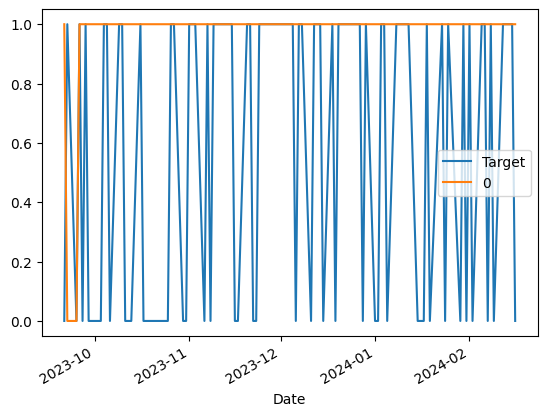

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=1)

train = stock.iloc[:-100]
test = stock.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
for i in range(1, num_prev_values + 1):
    predictors.append(f'D-{i}')
    predictors.append(f'V-{i}')

model.fit(train[predictors],train['Target'])
pred = model.predict(test[predictors])
pred = pd.Series(pred, index=test.index)

precision = precision_score(test['Target'] ,pred)

combined = pd.concat([test['Target'] ,pred],axis=1)
combined.plot()
precision
